# **Project Name**    - Android Authenticity Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **GitHub Link -**

https://github.com/Ryansh12/Android-Authenticity-Prediction

# **Problem Statement**


**This dataset consists of apps needed permissions during installation and run-time. We collect apps from three different sources: google play, third-party apps and malware dataset. This file contains more than 30,000 Android apps. features extracted at the time of installation and execution. One file contains the name of the features and others contain a .apk file corresponding to extracted permissions with respective packages. Apps are collected from Google's play store, hiapk, app china, Android, mumayi, gfan slideme, and pandaapp. These .apk files collected from the last three years continuously contain 81 distinct malware families. But, Here you are only supposed to predict whether the app is benign(0) or malware(1).**

#### **Define Your Business Objective?**

The objective of this project is to predict whether the android app is malware or benign based on Category, Rating, Number of ratings, Price, Dangerous permissions count, Safe permissions count and other such factors

## **Download Dataset**

In [ ]:
# Download the dataset
!gdown '1DQgeRkBy0LDwyf8k-VBBN02kc8_K9oi9'

Downloading...
From: https://drive.google.com/uc?id=1DQgeRkBy0LDwyf8k-VBBN02kc8_K9oi9
To: /content/ANDRIOD AUTHENTICITY PREDICTION.csv
100% 54.3M/54.3M [00:01<00:00, 53.0MB/s]


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import re
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('ANDRIOD AUTHENTICITY PREDICTION.csv')
data.shape

(29999, 184)

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(29999, 184)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

2689

In [ ]:
# print Duplicate rows
data[data.duplicated()]

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
681,JEFIT,je.fit,Health & Fitness,Professional Weight Training/Bodybuilding App ...,4.6,16488,0.00,"{net.kndy.liftinglog, air.net.kaisti.GymTrain,...",3.0,2,...,0,0,0,0,0,0,0,0,0,1
725,Opera Mini web browser,com.opera.mini.android,Communication,Opera's fastest mobile browser that can save y...,4.4,174293,0.00,"{uk.co.aloneguid.operanotes, com.opera.mini.vf...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
787,Venus And Adonis,indiaNIC.android.VenusandAdonis,Lifestyle,This is a fully annotated edition of all the p...,0.0,0,0.99,"{org.pagasus.android.derbytimer, com.knowledge...",0.0,0,...,0,0,0,0,0,0,0,0,0,1
841,Go Crazy Bananaz Free,air.com.zoki.gocrazybananazfree,Brain & Puzzle,Are you crazy enough to try this brain game? T...,3.6,11,0.00,"{air.com.zoki.hexapuzzlesforfree, air.com.zoki...",4.0,0,...,0,0,0,0,0,0,0,0,0,1
924,How to Tie a Tie,com.artelplus.howtotie,Books & Reference,How to Tie a Tie is a real life-saver for you ...,4.6,36143,0.00,"{com.popular.knots, biz.neoline.app_core.ui.an...",1.0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29969,Yahoo! Messenger Plug-in,com.yahoo.mobile.client.android.imvideo,Communication,Experience voice and video functionality in th...,4.0,52500,0.00,"{com.chikka.gero, com.gmail.galbayard, air.net...",9.0,4,...,0,0,0,0,0,0,0,0,0,1
29971,Bible,com.sirma.mobile.bible.android,Books & Reference,#1 Bible App; Read or listen to the Bible with...,4.7,270963,0.00,"{com.benzine.android.virtuebiblefe, com.bfa.st...",4.0,3,...,0,0,1,0,0,0,0,0,0,1
29972,Symphony of Eternity,kemco.wws.soe,Arcade & Action,High quality RPG for Android(TM) User.<p>2011/...,4.4,503,2.99,"{jp.mapp.yusha2e, game.activity.prod, com.alde...",0.0,1,...,0,0,0,0,0,0,0,0,0,1
29974,CamScanner -Phone PDF Creator,com.intsig.camscanner,Productivity,Turn phone to document scanner<p>CamScanner is...,4.5,28429,0.00,"{com.pwnwithyourphone.documentscanner.trial, c...",4.0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(27310, 184)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# columns with null value
null_columns=data.columns[data.isna().any()]
null_values_count = data[null_columns].isna().sum()
print("Null value count\n", null_values_count)

Null value count
 App                              1
Description                      3
Related apps                   720
Dangerous permissions count    201
dtype: int64


[Text(0, 0, '1'), Text(0, 0, '3'), Text(0, 0, '720'), Text(0, 0, '201')]

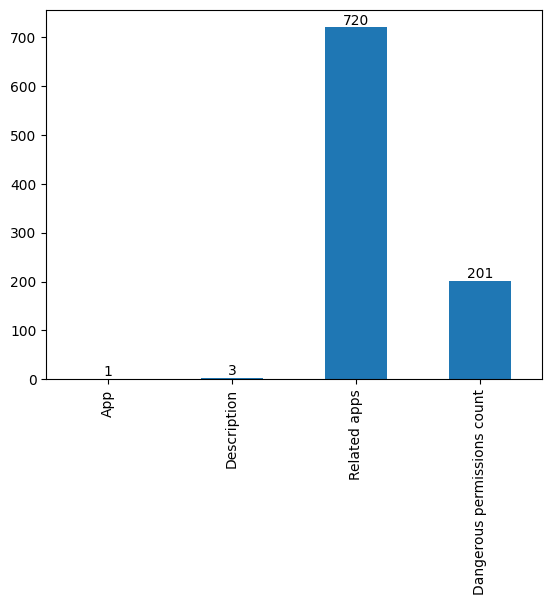

In [ ]:
# Visualizing the missing values
ax = null_values_count.plot.bar()
ax.bar_label(ax.containers[0]) # for showing count with respective columns

In [ ]:
null_value_percentage = data[null_columns].isna().sum()*100/len(data)
print("Null Value Count Percent\n", null_value_percentage)

Null Value Count Percent
 App                            0.003662
Description                    0.010985
Related apps                   2.636397
Dangerous permissions count    0.735994
dtype: float64


As the mentioned columns has less than 3% of the values missing in it. Therefore, we can drop these rows

In [ ]:
data = data.dropna(axis = 0)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [ ]:
# Dataset Describe

# For string
data.describe(include = ['O'])

,App,Package,Category,Description,Related apps
count,26586,26586,26586,26586,26586
unique,22176,22815,30,22997,23864
top,Tic Tac Toe,com.jb.gosms,Entertainment,Phrasebook and Translator contains all the ess...,{com.openkava.spinpic}
freq,44,6,2458,27,37


In [ ]:
# For numeric
data.describe(include=['float'])

,Rating,Price,Dangerous permissions count
count,26586.000000,26586.000000,26586.000000
mean,3.564493,0.599750,3.035733
std,1.380888,3.306346,2.993178
min,0.000000,0.000000,0.000000
25%,3.300000,0.000000,1.000000
50%,4.000000,0.000000,2.000000
75%,4.400000,0.000000,4.000000
max,5.000000,158.070000,30.000000


### Check Unique Values for each variable.

In [ ]:
data['Category'].value_counts()

Entertainment        2458
Travel & Local       1901
Books & Reference    1736
Arcade & Action      1635
Brain & Puzzle       1611
Casual               1443
Personalization      1398
Lifestyle            1274
Education            1222
Tools                1195
Communication         986
Finance               985
Health & Fitness      950
Business              891
Cards & Casino        765
Media & Video         715
Productivity          594
Sports                576
Comics                560
Libraries & Demo      550
Music & Audio         452
News & Magazines      415
Transportation        397
Social                344
Shopping              332
Sports Games          291
Photography           262
Racing                250
Medical               248
Weather               150
Name: Category, dtype: int64

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

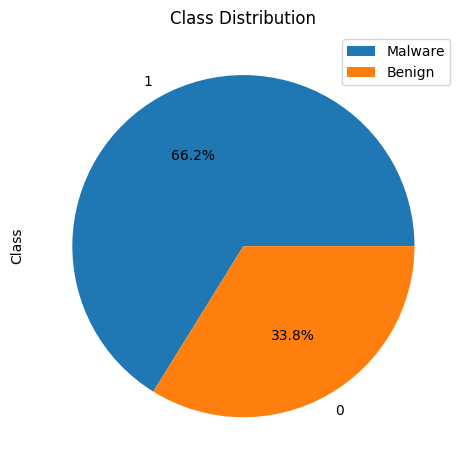

In [ ]:
data['Class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(labels=['Malware','Benign'])
plt.title('Class Distribution')
plt.tight_layout()

As Malware class constitute of 66.2% of dataset, we can say that the dataset is imbalanced


In [ ]:
# Visualizing Rating by converting it from numerical to categorical variable
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
binned_Ratings = pd.cut(data['Rating'], bins , labels=labels, include_lowest=True)
binned_Ratings

0        4
1        5
2        5
3        4
5        5
        ..
29993    5
29994    5
29995    5
29997    4
29998    3
Name: Rating, Length: 26586, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<Axes: title={'center': 'Percentage of Ratings'}, ylabel='Rating'>

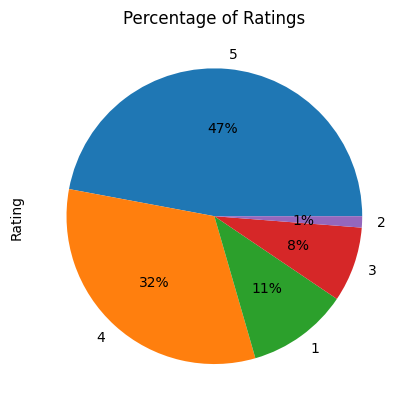

In [ ]:
plt.title('Percentage of Ratings')
binned_Ratings.value_counts().plot(kind='pie',autopct='%1.0f%%')

* Percentage of ratings is calculated by binning the numerical ratings into 1,2,3,4,5 categories.
* If rating is between 4 & 5 then it is binned into category 5 and so on
* Almost half of the ratings are between 4 & 5, followed by 31% of ratings between 3 & 4.
Very few(1%) of people rated the apps between 0 & 1


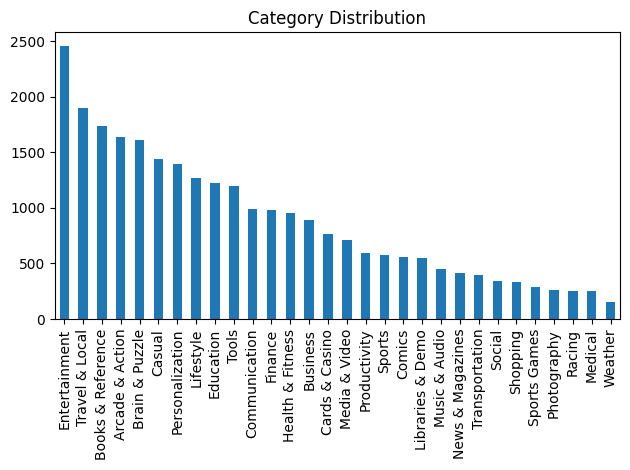

In [ ]:
data['Category'].value_counts().plot.bar()
plt.title('Category Distribution')
plt.tight_layout()

* Majority of android apps are from Entertainment Category, followed by “Travel & Local”, “Books & Reference”
* And thereafter the number of apps the respective categories is gradually declining


<Axes: title={'center': 'Number of ratings distribution'}, xlabel='Number of ratings', ylabel='Count'>

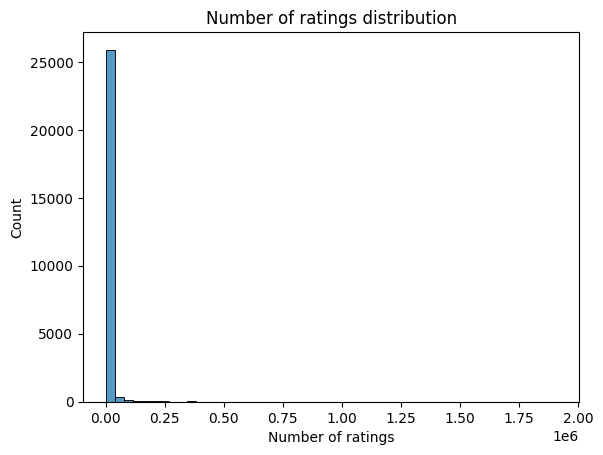

In [ ]:
plt.title('Number of ratings distribution')
sns.histplot(data= data, x = 'Number of ratings', bins = 50)

* Most of the apps have no ratings i.e zero number of ratings
* Very few apps have been given ratings

<Axes: title={'center': 'Price distribution'}, xlabel='Price', ylabel='Count'>

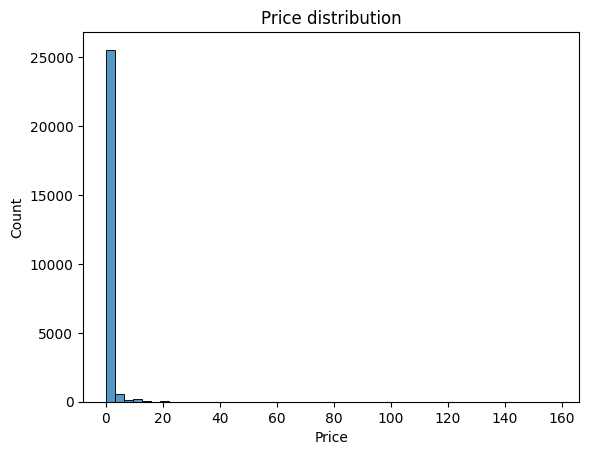

In [ ]:
plt.title('Price distribution')
sns.histplot(data= data, x = 'Price', bins = 50)

* Majority of android apps have zero price i.e they are free to use
* Very few apps are required to be paid to use them


<Axes: title={'center': 'Dangerous permissions count distribution'}, xlabel='Dangerous permissions count', ylabel='Count'>

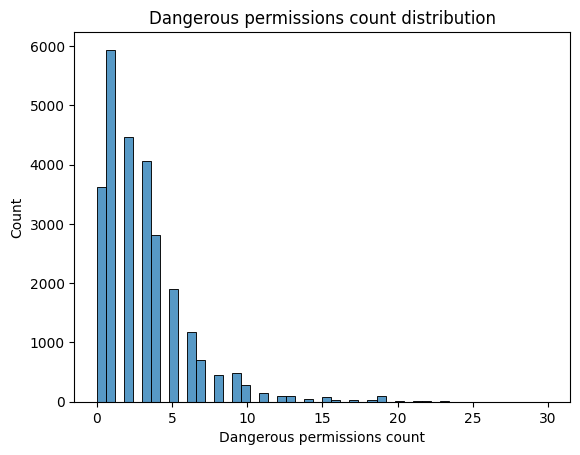

In [ ]:
plt.title('Dangerous permissions count distribution')
sns.histplot(data= data, x = 'Dangerous permissions count', bins = 50)

* Majority of the apps have less than 5 dangerous permission count
* Very few apps require more than 20  dangerous permissions


<Axes: title={'center': 'Safe permissions count distribution'}, xlabel='Safe permissions count', ylabel='Count'>

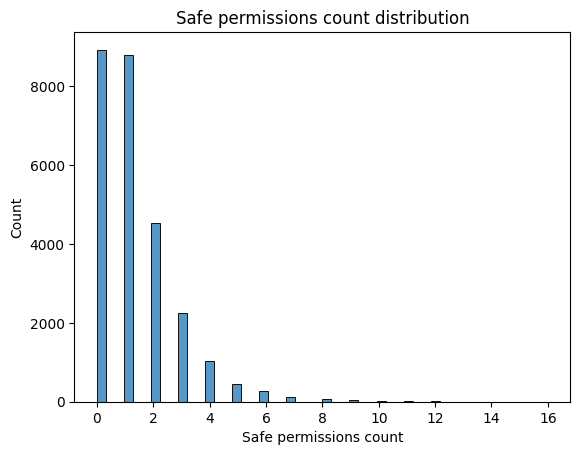

In [ ]:
plt.title('Safe permissions count distribution')
sns.histplot(data= data, x = 'Safe permissions count', bins = 50)

* Majority of the apps have less than 2 safe permission count
* Very few apps require more than 8 safe permissions


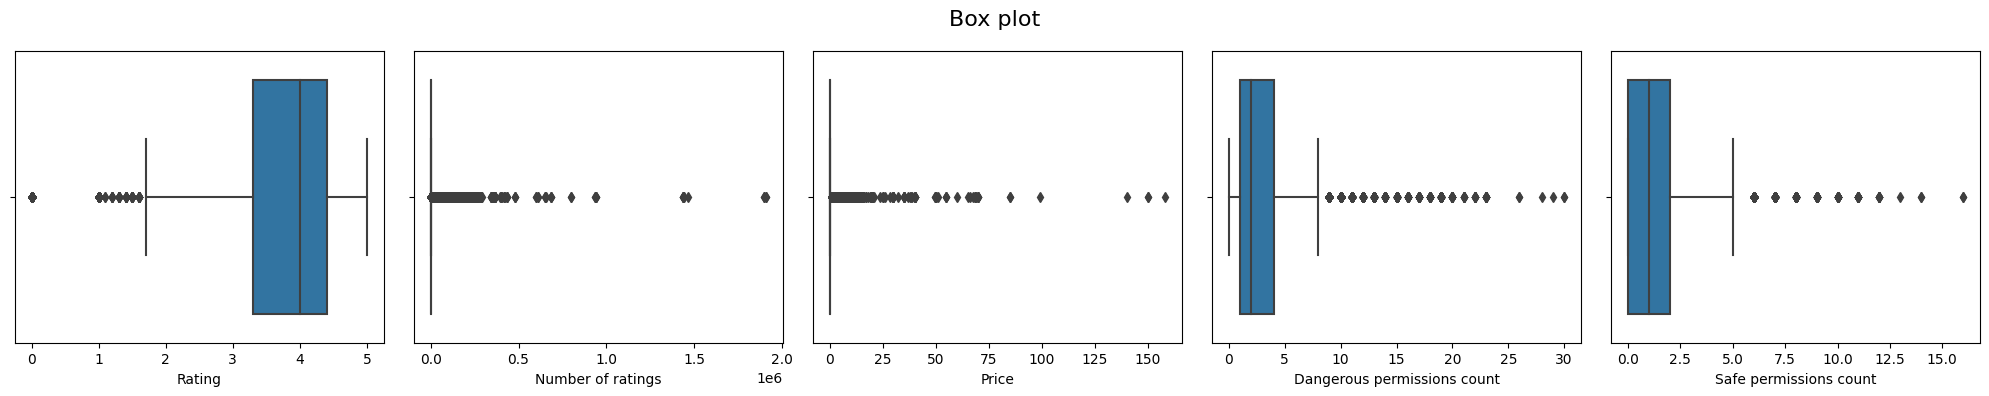

In [ ]:
# outlier detection in numerical features
cols = ['Rating','Number of ratings','Price','Dangerous permissions count','Safe permissions count']
row_num = 1
col_num = 5
fig, axes = plt.subplots(row_num , col_num , figsize=(20,4), squeeze=False)
fig.suptitle('Box plot', fontsize=16)

for i, col in enumerate(cols):
  row = int((i - i%col_num)/col_num)
  column = i%col_num
  ax = sns.boxplot(x = col, data = data, ax=axes[row , column])

# to avoid overlapping of subfigures
plt.tight_layout()
plt.show()

'Rating', 'Number of ratings', 'Price', 'Dangerous permissions count' & 'Safe permissions count' have outliers in them.

<ipython-input-36-602903f33806>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=axes[2], data=data, x='Price', hue='Class')


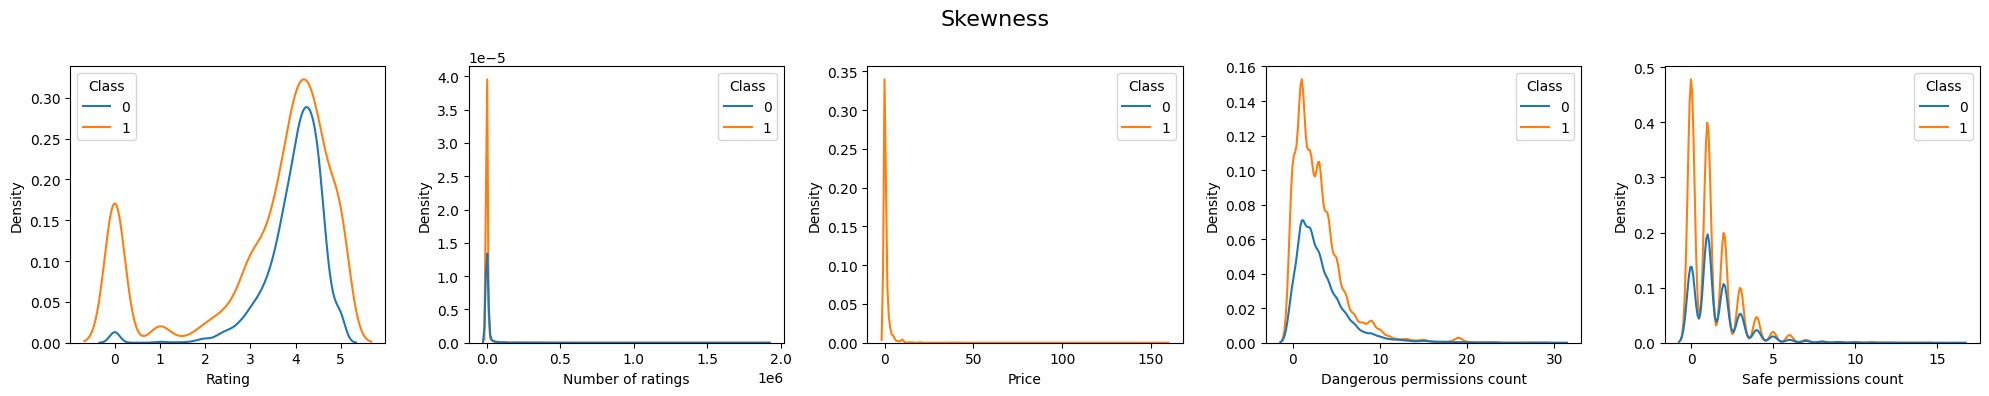

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Skewness', fontsize=16)

sns.kdeplot(ax=axes[0], data=data, x='Rating', hue='Class')
sns.kdeplot(ax=axes[1], data=data, x='Number of ratings', hue='Class')
sns.kdeplot(ax=axes[2], data=data, x='Price', hue='Class')
sns.kdeplot(ax=axes[3], data=data, x='Dangerous permissions count', hue='Class')
sns.kdeplot(ax=axes[4], data=data, x='Safe permissions count', hue='Class')

fig.tight_layout()
plt.show()

'Number of ratings', 'Price', 'Dangerous permissions count' & 'Safe permissions count' is left skewed


<Axes: title={'center': 'Dangerous permissions count distribution w.r.t Class'}, xlabel='Dangerous permissions count', ylabel='count'>

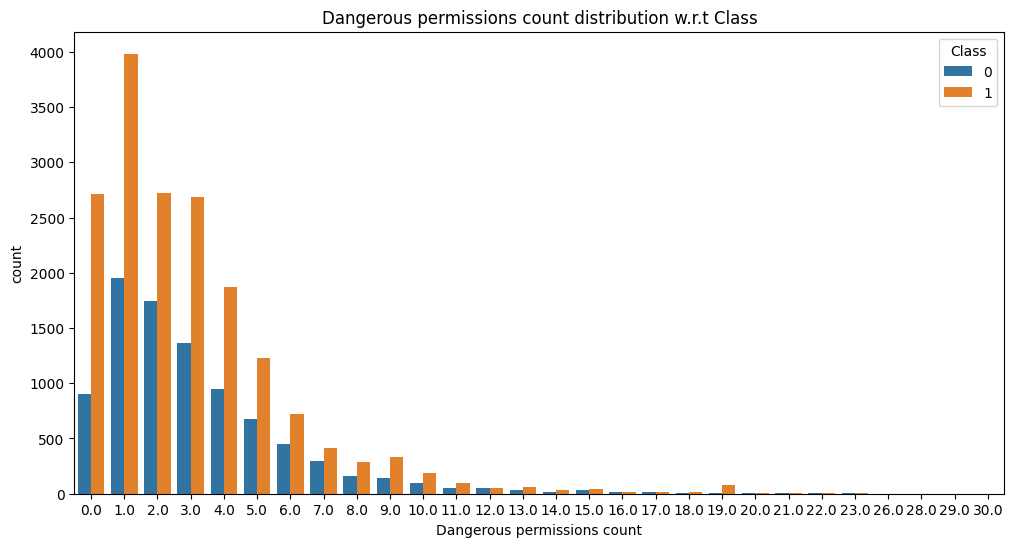

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Dangerous permissions count distribution w.r.t Class')
sns.countplot(data=data, x='Dangerous permissions count',hue='Class')

* There are more dangerous app permissions given to Malware apps than Benign apps
*  Also, Benign and Malware apps both have similar distribution of Dangerous Permissions count

<Axes: title={'center': 'Safe permissions count distribution w.r.t Class'}, xlabel='Safe permissions count', ylabel='count'>

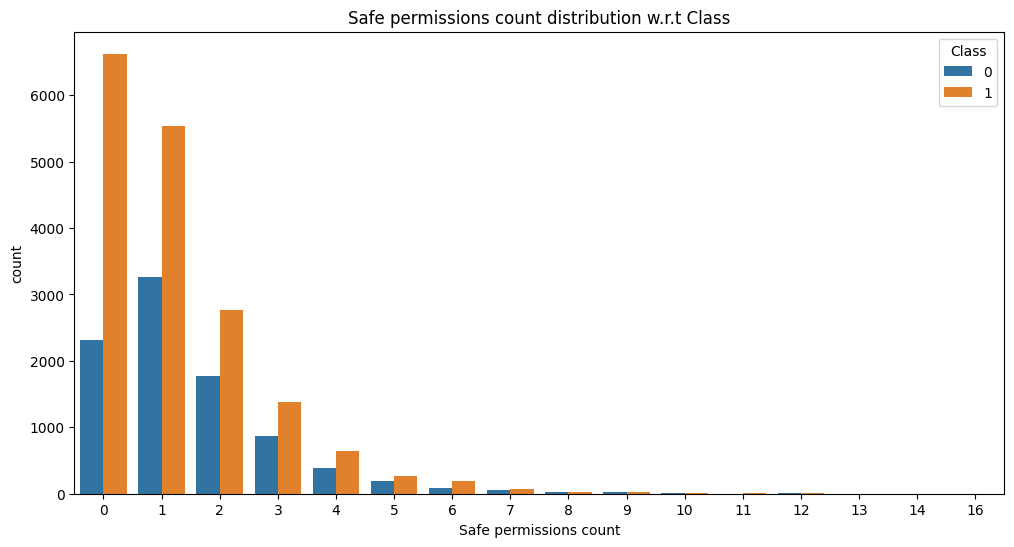

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Safe permissions count distribution w.r.t Class')
sns.countplot(data=data, x='Safe permissions count',hue='Class')

* There are more safe app permissions given to Malware apps than Benign apps
*  Also, Benign and Malware apps both have similar distribution of safe Permissions count

<ipython-input-39-e2a2bd95b88d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.xaxis.set_ticklabels(axes.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Category distribution w.r.t Class')

<Figure size 2000x2000 with 0 Axes>

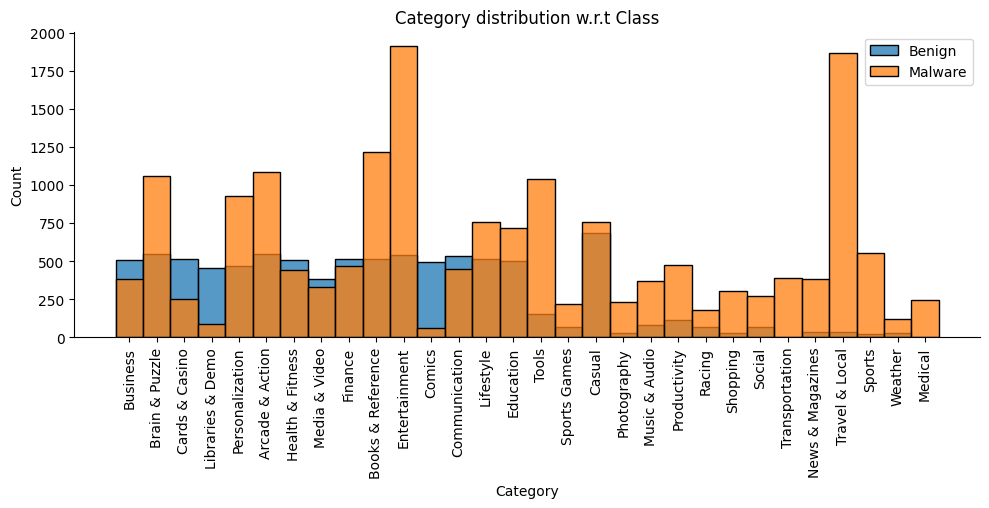

In [ ]:
plt.figure(figsize=(20, 20))
ax=sns.FacetGrid(data, hue='Class', height=5, aspect=2)
ax1 =    ax.map(sns.histplot, 'Category')

for axes in ax.axes.flat:
    _ = axes.xaxis.set_ticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.legend(labels=['Benign','Malware'])
plt.title('Category distribution w.r.t Class')

* Most of the categories have more malware apps then benign apps
* Business, 'Cards& Casino', 'Libraries & Demo', 'Heath& Fitness',  'Media & Video', 'Comics', 'Communication', 'Casual' Categories have more benign apps than malware apps


#### Pair Plot

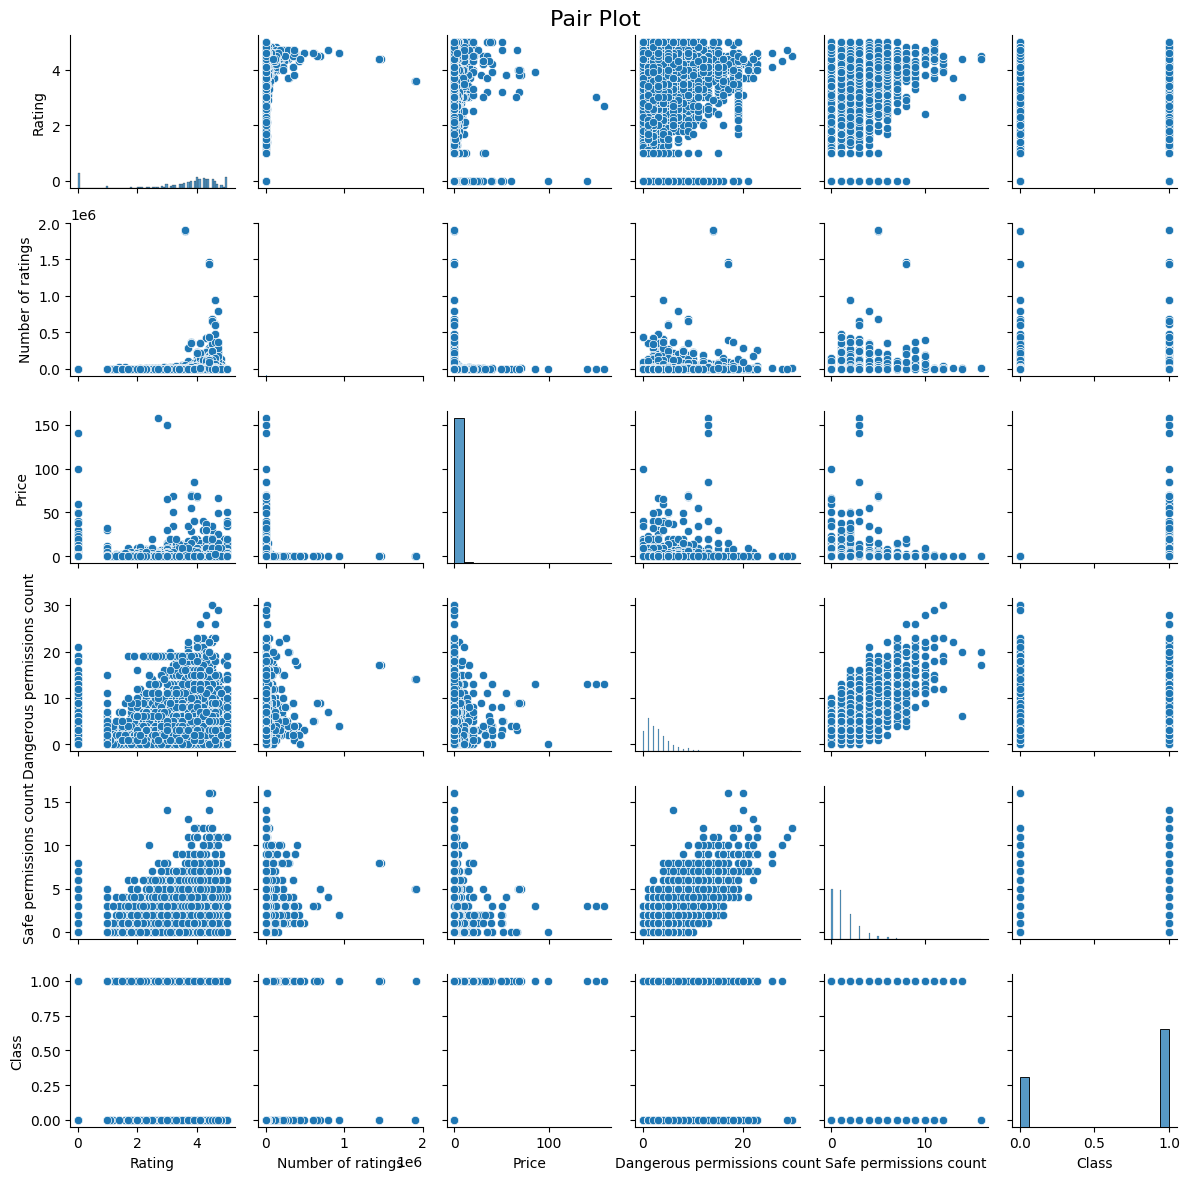

In [ ]:
sns.pairplot(data[['Rating','Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count','Class']], height=2).fig.suptitle('Pair Plot', fontsize=16)
plt.tight_layout()

#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

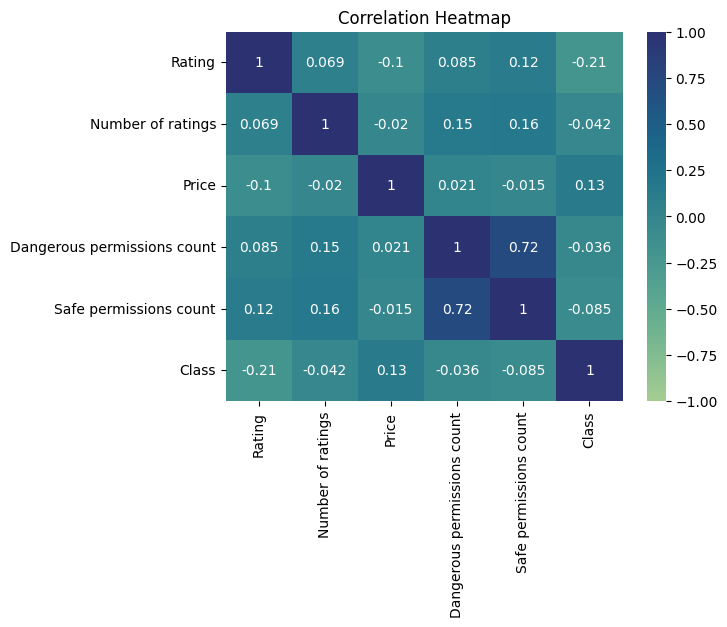

In [ ]:
sns.heatmap( data[['Rating','Number of ratings', 'Price', 'Dangerous permissions count', 'Safe permissions count','Class']].corr(numeric_only=True), cmap='crest', annot=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize = 12)

* 'Dangerous Permissions count' and 'Safe Permissions count' are highly correlated(0.72), means more the more number of Dangerous Permissions Count, it is more likely that it will have more safe Permissions count as well
* 'Rating' and 'Class' are negatively correlated, means if the Ratings decrease, then the app is more likey to be Malware
* 'Rating' and 'Price' is also negatively correlated, means more the Ratings of the app, less price or the app is likely to be free of cost to use


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
data['Dangerous permissions count'].skew()

2.2472631408209067

As data has skewed distribution, therefore using Capping & Percentile Method

In [ ]:
def percentile_capping(attribute):
  # Computing 10th, 90th percentiles and replacing the outliers
  tenth_percentile = np.percentile(data[attribute], 10)
  ninetieth_percentile = np.percentile(data[attribute], 90)
  data[attribute] = np.where(data[attribute]<tenth_percentile, tenth_percentile, data[attribute])
  data[attribute] = np.where(data[attribute]>ninetieth_percentile, ninetieth_percentile, data[attribute])
  return data[attribute]

In [ ]:
data['Dangerous permissions count'] = percentile_capping('Dangerous permissions count')
data['Number of ratings'] = percentile_capping('Number of ratings')
data['Price'] = percentile_capping('Price')
data['Dangerous permissions count'] = percentile_capping('Dangerous permissions count')

### Data Tranformation

In [ ]:
Rating_skewness = data['Rating'].skew()

# Rating + 1  added to deal with "0" ratings
Rating_log = np.log(data['Rating']+1)
Rating_sqrt = np.sqrt(data['Rating'])
# Rating + 1  added to deal with "0" ratings
Rating_boxcox = pd.Series(stats.boxcox(data['Rating']+1)[0])

print("Rating Skewness:", Rating_skewness)
print("Rating Skewness after Log transformation:", Rating_log.skew())
print("Rating Skewness after sqrt transformation:", Rating_sqrt.skew())
print("Rating Skewness after boxcox transformation:", Rating_boxcox.skew())

Rating Skewness: -1.6485801322196836
Rating Skewness after Log transformation: -2.2223257537160985
Rating Skewness after sqrt transformation: -2.2521914407013774
Rating Skewness after boxcox transformation: -0.6564350959963611


BoxCox Transformation reduced the Skewness Drastically

In [ ]:
data['Rating'] = Rating_boxcox.to_numpy()

In [ ]:
number_of_ratings_skewness = data['Number of ratings'].skew()

# Number of ratings + 1  added to deal with "0" Number of ratings
number_of_ratings_log = np.log(data['Number of ratings']+1)
number_of_ratings_sqrt = np.sqrt(data['Number of ratings'])
# Number of ratings + 1  added to deal with "0" Number of ratingss
number_of_ratings_boxcox = pd.Series(stats.boxcox(data['Number of ratings']+1)[0])

print("Number of ratings Skewness:", number_of_ratings_skewness)
print("Number of ratings Skewness after Log transformation:", number_of_ratings_log.skew())
print("Number of ratings Skewness after sqrt transformation:", number_of_ratings_sqrt.skew())
print("Number of ratings Skewness after boxcox transformation:", number_of_ratings_boxcox.skew())

Number of ratings Skewness: 1.9818692541668368
Number of ratings Skewness after Log transformation: 0.3063451187321043
Number of ratings Skewness after sqrt transformation: 1.472073949756608
Number of ratings Skewness after boxcox transformation: 0.09000420858973417


BoxCox Transformation reduced the Skewness Drastically

In [ ]:
data['Number of ratings'] = number_of_ratings_boxcox.to_numpy()

In [ ]:
price_skewness = data['Price'].skew()

# Price + 1  added to deal with "0" Prices
price_log = np.log(data['Price']+1)
price_sqrt = np.sqrt(data['Price'])
# Price + 1  added to deal with "0" Prices
price_boxcox = pd.Series(stats.boxcox(data['Price']+1)[0])

print("Price Skewness:", price_skewness)
print("Price Skewness after Log transformation:", price_log.skew())
print("Price Skewness after sqrt transformation:", price_sqrt.skew())
print("Price Skewness after boxcox transformation:", price_boxcox.skew())

Price Skewness: 1.7558846000497208
Price Skewness after Log transformation: 1.703197420211498
Price Skewness after sqrt transformation: 1.6772145067238018
Price Skewness after boxcox transformation: 1.64641232103964


BoxCox Transformation reduced the Skewness Drastically

In [ ]:
data['Price'] = price_boxcox.to_numpy()

In [ ]:
dangerous_permissions_count_skewness = data['Dangerous permissions count'].skew()

# Dangerous permissions count + 1  added to deal with "0" Dangerous permissions counts
dangerous_permissions_count_log = np.log(data['Dangerous permissions count']+1)
dangerous_permissions_count_sqrt = np.sqrt(data['Dangerous permissions count'])
# Dangerous permissions count + 1  added to deal with "0" Dangerous permissions counts
dangerous_permissions_count_boxcox = pd.Series(stats.boxcox(data['Dangerous permissions count']+1)[0])

print("Dangerous permissions count Skewness:", dangerous_permissions_count_skewness)
print("Dangerous permissions count Skewness after Log transformation:", dangerous_permissions_count_log.skew())
print("Dangerous permissions count Skewness after sqrt transformation:", dangerous_permissions_count_sqrt.skew())
print("Dangerous permissions count Skewness after boxcox transformation:", dangerous_permissions_count_boxcox.skew())

Dangerous permissions count Skewness: 0.3891942079829945
Dangerous permissions count Skewness after Log transformation: -0.42778504149076874
Dangerous permissions count Skewness after sqrt transformation: -0.5469294884101273
Dangerous permissions count Skewness after boxcox transformation: -0.08394922516217516


BoxCox Transformation reduced the Skewness Drastically

In [ ]:
data['Dangerous permissions count'] = dangerous_permissions_count_boxcox.to_numpy()

## ***Splitting Data***

In [ ]:
X = data.drop('Class', axis = 1)
y = pd.DataFrame(data['Class'])

In [ ]:
# splitting the data with stratify parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# for creating new indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Data Scaling

In [ ]:
# Scaling your data
def StandardScaling_attribute(attribute):
  scaler = StandardScaler()
  scaled_train= scaler.fit_transform(X_train[attribute].values.reshape(-1,1))
  scaled_test = scaler.transform(X_test[attribute].values.reshape(-1,1))

  return scaled_train, scaled_test

In [ ]:
scaled_Rating_train, scaled_Rating_test = StandardScaling_attribute('Rating')
scaled_Number_of_ratings_train, scaled_Number_of_ratings_test = StandardScaling_attribute('Number of ratings')
scaled_Price_train, scaled_Price_test = StandardScaling_attribute('Price')
scaled_Dangerous_permissions_count_train, scaled_Dangerous_permissions_count_test = StandardScaling_attribute('Dangerous permissions count')
scaled_Safe_permissions_count_train, scaled_Safe_permissions_count_test = StandardScaling_attribute('Safe permissions count')

### Categorical Encoding

In [ ]:
# Encode your categorical columns
def One_Hot_Encoding_Categories(train_category,test_category):

    le = LabelEncoder()
    le_train = le.fit_transform(train_category)
    le_test = le.transform(test_category)

    enc = OneHotEncoder(handle_unknown='ignore')
    OHE_train = enc.fit_transform(le_train.reshape(-1, 1))
    OHE_test = enc.transform(le_test.reshape(-1, 1))
    return OHE_train, OHE_test

In [ ]:
OHE_Category_train, OHE_Category_test = One_Hot_Encoding_Categories(X_train['Category'],X_test['Category'])

### Textual Data Preprocessing


In [ ]:
def preprocess(text):
    """Preprocessing text """

    #TEXT
    #Delete all the tags like "< anyword >"
    text=re.sub('<[^>]*>'," ",text)

    #Delete all the data which are present in the brackets.
    text=re.sub('\([^)]*\)'," ",text)

    #Remove all the newlines('\n'), tabs('\t'), "-", "\".
    text=re.sub('\\r'," ",text)
    text=re.sub('\\t'," ",text)
    text=re.sub('\\n'," ",text)
    text=re.sub('-'," ",text)
    text=re.sub(r'\\'," ",text)

    #Decontractions, replace words like below to full words.
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # removing extra white spaces
    text = re.sub(' +',' ',text).strip()

    #Replace all the digits with space i.e delete all the digits.
    text = re.sub('[0-9]',"", text)

    #Convert all the words into lower case
    text = text.lower()

    # removing words greater than or equal to 15
    text = re.sub('[a-zA-Z]{15,}'," ",text)

    # removing words length equal to 2
    text = re.sub('(?<![a-zA-Z])[a-zA-Z]{2}(?![a-zA-Z])'," ",text)

    # removing words length equal to 1
    text = re.sub('(?<![a-zA-Z])[a-zA-Z]{1}(?![a-zA-Z])'," ",text)

    #replace all the words except "A-Za-z_" with space.
    text = re.sub('[^A-Za-z_]+', ' ', text)

    # removing extra white spaces
    text = re.sub(' +',' ',text).strip()

    return text

In [ ]:
X_train['Description'] = X_train['Description'].apply(lambda x: preprocess(str(x)))
X_train['Package'] = X_train['Package'].apply(lambda x: preprocess(str(x)))
X_train['App'] = X_train['App'].apply(lambda x: preprocess(str(x)))
X_train['Related apps'] = X_train['Related apps'].apply(lambda x: preprocess(str(x)))

X_test['Description'] = X_test['Description'].apply(lambda x: preprocess(str(x)))
X_test['Package'] = X_test['Package'].apply(lambda x: preprocess(str(x)))
X_test['App'] = X_test['App'].apply(lambda x: preprocess(str(x)))
X_test['Related apps'] = X_test['Related apps'].apply(lambda x: preprocess(str(x)))

In [ ]:
def BOW_Vectorizer(preprocessed_text):
  preprocessed_text_values = X_train[preprocessed_text].values

  vectorizer = CountVectorizer(ngram_range=(1,4), max_features=10000)
  BOW_train = vectorizer.fit_transform(preprocessed_text_values)
  BOW_column_names = vectorizer.get_feature_names_out()

  BOW_test = vectorizer.transform(X_test[preprocessed_text].values)
  return  BOW_column_names, BOW_train, BOW_test

In [ ]:
BOW_App_column_names, BOW_App_train, BOW_App_test = BOW_Vectorizer('App')
BOW_Description_column_names, BOW_Description_train, BOW_Description_test = BOW_Vectorizer('Description')
BOW_Package_column_names, BOW_Package_train, BOW_Package_test = BOW_Vectorizer('Package')
BOW_Related_apps_column_names, BOW_Related_apps_train, BOW_Related_apps_test = BOW_Vectorizer('Related apps')

In [ ]:
ft_train = hstack((BOW_App_train, OHE_Category_train, BOW_Package_train, BOW_Description_train,
                      scaled_Rating_train, scaled_Number_of_ratings_train, scaled_Price_train,
                      BOW_Related_apps_train, scaled_Dangerous_permissions_count_train,
                      scaled_Safe_permissions_count_train,X_train.iloc[:,10:]))

In [ ]:
ft_test = hstack((BOW_App_test, OHE_Category_test, BOW_Package_test, BOW_Description_test,
                      scaled_Rating_test, scaled_Number_of_ratings_test, scaled_Price_test,
                      BOW_Related_apps_test, scaled_Dangerous_permissions_count_test,
                      scaled_Safe_permissions_count_test,X_test.iloc[:,10:]))

In [ ]:
# No Need to perform SMOTE(for oversampling) on test data
%%time

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(ft_train, y_train)

CPU times: user 15min 29s, sys: 528 ms, total: 15min 29s
Wall time: 8min 54s


## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = {'max_depth': [1, 3, 10, 30], 'min_samples_split':[5, 10, 100, 500]}

decision_tree_clf = DecisionTreeClassifier(random_state=0)

decision_tree_grid= GridSearchCV(decision_tree_clf, param_grid=params,scoring='roc_auc',n_jobs=-2,  cv= 10, verbose=1,return_train_score=True)
# cv = 10 i.e 10 fold

decision_tree_grid.fit(X_train_res, y_train_res)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
CPU times: user 11min 2s, sys: 733 ms, total: 11min 2s
Wall time: 11min 23s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-2,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
decision_tree_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
train_auc= decision_tree_grid.cv_results_['mean_train_score']
cv_auc = decision_tree_grid.cv_results_['mean_test_score']
best_max_depth=decision_tree_grid.best_params_['max_depth']
best_min_samples_split=decision_tree_grid.best_params_['min_samples_split']
bestScore=decision_tree_grid.best_score_

In [ ]:
print("Train AUC:", train_auc)
print("\nCV AUC:", cv_auc)
print("\nBest max_depth:", best_max_depth)
print("\nBest min_samples_split:", best_min_samples_split)
print("\nBest Score:", bestScore)

Train AUC: [0.69298824 0.69298824 0.69298824 0.69298824 0.786759   0.786759
 0.786759   0.7860888  0.88663387 0.88634213 0.88268821 0.87189418
 0.97937352 0.97660245 0.95742617 0.93158917]

CV AUC: [0.691753   0.691753   0.691753   0.691753   0.7861077  0.7861077
 0.7861077  0.78543694 0.86101777 0.8611745  0.86622412 0.86532723
 0.81181075 0.82918471 0.89463844 0.90467543]

Best max_depth: 30

Best min_samples_split: 500

Best Score: 0.9046754348217616


In [ ]:
clf = DecisionTreeClassifier(max_depth = best_max_depth, min_samples_split = best_min_samples_split, random_state=0)
clf.fit(X_train_res, y_train_res)

y_train_pred_proba = clf.predict_proba(X_train_res)[:,1]
y_test_pred_proba = clf.predict_proba(ft_test)[:,1]

train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train_res, y_train_pred_proba)
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

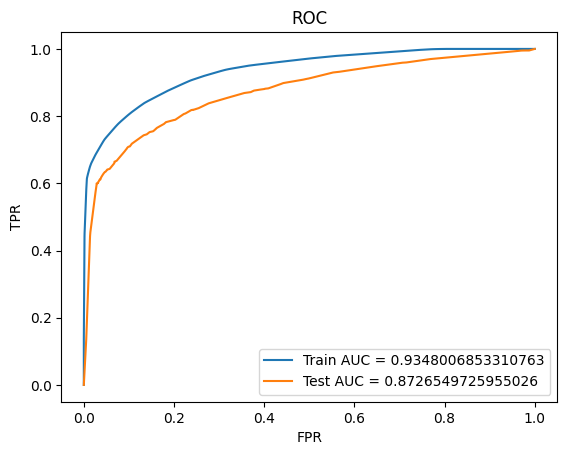

In [ ]:
plt.plot(train_fpr,train_tpr, label = "Train AUC = {0}".format(train_roc_auc))
plt.plot(test_fpr,test_tpr, label = "Test AUC = {0}".format(test_roc_auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.show()

In [ ]:
# Prediction
y_pred_test = clf.predict(ft_test)
y_pred_train = clf.predict(X_train_res)

# Evaluation metrics for test
print('Classification report for DecisionTree Regression= ')
DecisionTree_cls_report = classification_report(y_pred_test, y_test)
print(DecisionTree_cls_report)

Classification report for DecisionTree Regression= 
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3607
           1       0.79      0.89      0.83      5167

    accuracy                           0.79      8774
   macro avg       0.79      0.77      0.78      8774
weighted avg       0.79      0.79      0.79      8774



### ML Model - 2

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = { 'C' : [ 10, 1.0, 0.1, 0.01] }

LR_clf = LogisticRegression(random_state=0, class_weight='balanced', max_iter = 1000)

LR_grid= GridSearchCV(LR_clf, param_grid=params, scoring='roc_auc', n_jobs=-1, cv= 3, verbose=1, return_train_score=True)
# cv =3 i.e 3 fold

LR_grid.fit(X_train_res, y_train_res.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
CPU times: user 17.8 s, sys: 17.5 s, total: 35.3 s
Wall time: 2min 6s


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=0),
             n_jobs=-1, param_grid={'C': [10, 1.0, 0.1, 0.01]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
LR_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
train_auc= LR_grid.cv_results_['mean_train_score']
cv_auc = LR_grid.cv_results_['mean_test_score']
best_C=LR_grid.best_params_['C']
bestScore=LR_grid.best_score_

In [ ]:
print("Train AUC:", train_auc)
print("\nCV AUC:", cv_auc)
print("\nBest C:", best_C)
print("\nBest Score:", bestScore)

Train AUC: [0.99870418 0.99838687 0.9942002  0.96498137]

CV AUC: [0.90911629 0.91416031 0.91826911 0.90977357]

Best C: 0.1

Best Score: 0.918269111927767


In [ ]:
clf = LogisticRegression(random_state=0, class_weight='balanced', max_iter=500, C = best_C)
clf.fit(X_train_res, y_train_res.values.ravel())

#[:,1] because it returns probabilities for both classes
y_train_pred_proba = clf.predict_proba(X_train_res)[:,1]
y_test_pred_proba = clf.predict_proba(ft_test)[:,1]

train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train_res, y_train_pred_proba)
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

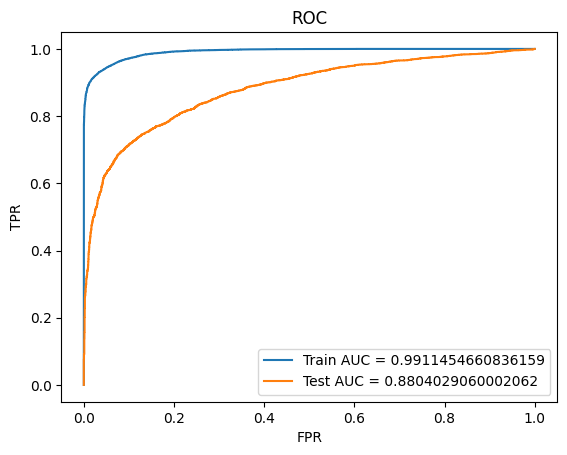

In [ ]:
plt.plot(train_fpr,train_tpr, label = "Train AUC = {0}".format(train_roc_auc))
plt.plot(test_fpr,test_tpr, label = "Test AUC = {0}".format(test_roc_auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.show()

In [ ]:
# Prediction
y_pred_test = clf.predict(ft_test)
y_pred_train = clf.predict(X_train_res)

# Evaluation metrics for test
print('Classification report for Logistic Regression = ')
LR_cls_report = classification_report(y_pred_test, y_test)
print(LR_cls_report)

Classification report for Logistic Regression = 
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3206
           1       0.83      0.87      0.85      5568

    accuracy                           0.80      8774
   macro avg       0.79      0.78      0.78      8774
weighted avg       0.80      0.80      0.80      8774



### ML Model - 3

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = {  'C' : [0.1, 1.0, 10]}

SVC_clf = SVC(random_state=0)

SVC_grid= GridSearchCV(SVC_clf, param_grid=params, scoring='roc_auc', n_jobs=-2, cv= 3, verbose=10, return_train_score=True)
# cv =3 i.e 3 fold

SVC_grid.fit(X_train_res, y_train_res.values.ravel())

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START C=0.1.......................................................
[CV 1/3; 1/3] END ....C=0.1;, score=(train=0.886, test=0.804) total time= 6.7min
[CV 2/3; 1/3] START C=0.1.......................................................
[CV 2/3; 1/3] END ....C=0.1;, score=(train=0.873, test=0.846) total time= 6.9min
[CV 3/3; 1/3] START C=0.1.......................................................
[CV 3/3; 1/3] END ....C=0.1;, score=(train=0.855, test=0.883) total time= 7.2min
[CV 1/3; 2/3] START C=1.0.......................................................
[CV 1/3; 2/3] END ....C=1.0;, score=(train=0.977, test=0.890) total time= 5.3min
[CV 2/3; 2/3] START C=1.0.......................................................
[CV 2/3; 2/3] END ....C=1.0;, score=(train=0.969, test=0.910) total time= 5.7min
[CV 3/3; 2/3] START C=1.0.......................................................
[CV 3/3; 2/3] END ....C=1.0;, score=(train=0.961, 

GridSearchCV(cv=3, estimator=SVC(random_state=0), n_jobs=-2,
             param_grid={'C': [0.1, 1.0, 10]}, return_train_score=True,
             scoring='roc_auc', verbose=10)

In [ ]:
SVC_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
train_auc= SVC_grid.cv_results_['mean_train_score']
cv_auc = SVC_grid.cv_results_['mean_test_score']
best_C=SVC_grid.best_params_['C']
bestScore=SVC_grid.best_score_

In [ ]:
print("Train AUC:", train_auc)
print("\nCV AUC:", cv_auc)
print("\nBest C:", best_C)
print("\nBest Score:", bestScore)

Train AUC: [0.87098117 0.96885899 0.9929947 ]

CV AUC: [0.84431562 0.9122945  0.92046054]

Best C: 10

Best Score: 0.9204605377551798


In [ ]:
clf = SVC(C = best_C, random_state=0, probability=True)
clf.fit(X_train_res, y_train_res.values.ravel())

#[:,1] because it returns probabilities for both classes
y_train_pred_proba = clf.predict_proba(X_train_res)[:,1]
y_test_pred_proba = clf.predict_proba(ft_test)[:,1]

train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train_res, y_train_pred_proba)
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

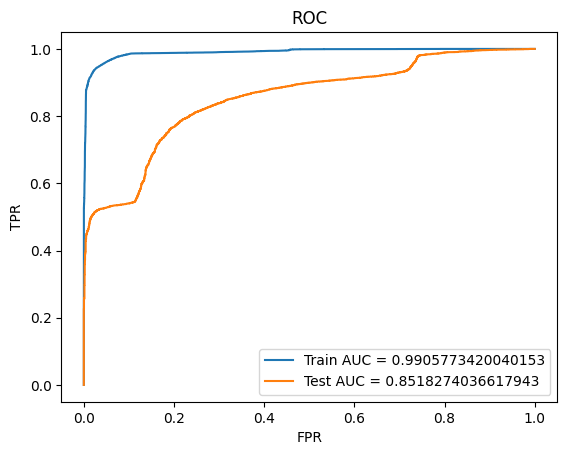

In [ ]:
plt.plot(train_fpr,train_tpr, label = "Train AUC = {0}".format(train_roc_auc))
plt.plot(test_fpr,test_tpr, label = "Test AUC = {0}".format(test_roc_auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.show()

In [ ]:
# Prediction
y_pred_test = clf.predict(ft_test)
y_pred_train = clf.predict(X_train_res)

# Evaluation metrics for test
print('Classification report for SVM = ')
SVM_cls_report = classification_report(y_pred_test, y_test)
print(SVM_cls_report)

Classification report for SVM = 
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2986
           1       0.84      0.84      0.84      5788

    accuracy                           0.79      8774
   macro avg       0.77      0.77      0.77      8774
weighted avg       0.79      0.79      0.79      8774



### ML Model - 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time

# Performing Hyperparameter Tuning.

params = {'n_estimators': [50,100, 200, 500]}

random_forest_reg = RandomForestClassifier(random_state=0)

random_forest_grid = GridSearchCV(random_forest_reg, param_grid=params,scoring='roc_auc',n_jobs=-2,  cv= 3, verbose=10,return_train_score=True)
# cv =10 i.e 10 fold


random_forest_grid.fit(X_train_res, y_train_res.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START n_estimators=50.............................................
[CV 1/3; 1/4] END n_estimators=50;, score=(train=1.000, test=0.821) total time= 1.1min
[CV 2/3; 1/4] START n_estimators=50.............................................
[CV 2/3; 1/4] END n_estimators=50;, score=(train=1.000, test=0.893) total time= 1.4min
[CV 3/3; 1/4] START n_estimators=50.............................................
[CV 3/3; 1/4] END n_estimators=50;, score=(train=0.999, test=0.970) total time= 1.9min
[CV 1/3; 2/4] START n_estimators=100............................................
[CV 1/3; 2/4] END n_estimators=100;, score=(train=1.000, test=0.830) total time= 1.7min
[CV 2/3; 2/4] START n_estimators=100............................................
[CV 2/3; 2/4] END n_estimators=100;, score=(train=1.000, test=0.896) total time= 3.0min
[CV 3/3; 2/4] START n_estimators=100............................................
[CV 3/3; 2/4] END

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-2,
             param_grid={'n_estimators': [50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [ ]:
train_auc= random_forest_grid.cv_results_['mean_train_score']
cv_auc = random_forest_grid.cv_results_['mean_test_score']
best_n_estimators=random_forest_grid.best_params_['n_estimators']
bestScore=random_forest_grid.best_score_

In [ ]:
print("Train AUC:", train_auc)
print("\nCV AUC:", cv_auc)
print("\nBest n_estimators:", best_n_estimators)
print("\nBest Score:", bestScore)

Train AUC: [0.99951373 0.99956195 0.99957738 0.99958946]

CV AUC: [0.89473169 0.89954401 0.90268183 0.90443443]

Best n_estimators: 500

Best Score: 0.9044344276303037


In [ ]:
clf = RandomForestClassifier(n_estimators= best_n_estimators,random_state=0)
clf.fit(X_train_res, y_train_res.values.ravel())

#[:,1] because it returns probabilities for both classes
y_train_pred_proba = clf.predict_proba(X_train_res)[:,1]
y_test_pred_proba = clf.predict_proba(ft_test)[:,1]

train_fpr, train_tpr, thresholds = metrics.roc_curve(y_train_res, y_train_pred_proba)
test_fpr, test_tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

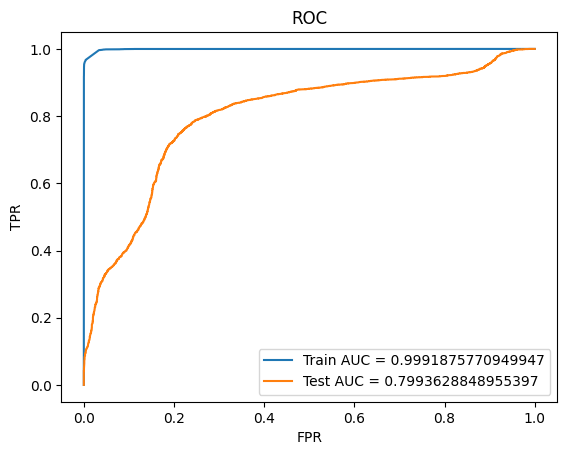

In [ ]:
plt.plot(train_fpr,train_tpr, label = "Train AUC = {0}".format(train_roc_auc))
plt.plot(test_fpr,test_tpr, label = "Test AUC = {0}".format(test_roc_auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.show()

In [ ]:
# Prediction
y_pred_test = clf.predict(ft_test)
y_pred_train = clf.predict(X_train_res)

# Evaluation metrics for test
print('Classification report for RandomForest= ')
RF_cls_report = classification_report(y_pred_test, y_test)
print(RF_cls_report)

Classification report for RandomForest= 
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      2205
           1       0.88      0.78      0.83      6569

    accuracy                           0.75      8774
   macro avg       0.69      0.73      0.70      8774
weighted avg       0.79      0.75      0.76      8774

